In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pair_btc =(
        'ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'BCCBTC', 'GASBTC', 'BTCUSDT', 'MCOBTC', 'WTCBTC', 'LRCBTC', 'QTUMBTC',
        'YOYOBTC', 'OMGBTC', 'ZRXBTC', 'STRATBTC', 'SNGLSBTC', 'BQXBTC', 'KNCBTC', 'FUNBTC', 'SNMBTC', 'IOTABTC', 'LINKBTC',
        'XVGBTC', 'SALTBTC', 'MDABTC', 'MTLBTC', 'SUBBTC', 'EOSBTC', 'SNTBTC', 'ETCBTC', 'MTHBTC', 'ENGBTC', 'DNTBTC',
        'ZECBTC', 'BNTBTC', 'ASTBTC', 'DASHBTC', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'EVXBTC', 'REQBTC', 'VIBBTC', 'TRXBTC',
        'POWRBTC', 'ARKBTC', 'XRPBTC', 'MODBTC', 'ENJBTC', 'STORJBTC', 'KMDBTC', 'RCNBTC', 'NULSBTC', 'RDNBTC', 'XMRBTC',
        'DLTBTC', 'AMBBTC', 'BATBTC', 'BCPTBTC', 'ARNBTC', 'GVTBTC', 'CDTBTC', 'GXSBTC', 'POEBTC', 'QSPBTC', 'BTSBTC',
        'XZCBTC', 'LSKBTC', 'TNTBTC', 'FUELBTC', 'MANABTC', 'BCDBTC', 'DGDBTC', 'ADXBTC', 'ADABTC', 'PPTBTC', 'CMTBTC',
        'XLMBTC', 'CNDBTC', 'LENDBTC', 'WABIBTC', 'TNBBTC', 'WAVESBTC', 'GTOBTC', 'ICXBTC', 'OSTBTC', 'ELFBTC', 'AIONBTC',
        'NEBLBTC', 'BRDBTC', 'EDOBTC', 'WINGSBTC', 'NAVBTC', 'LUNBTC', 'TRIGBTC', 'APPCBTC', 'VIBEBTC', 'RLCBTC', 'INSBTC',
        'PIVXBTC', 'IOSTBTC', 'CHATBTC', 'STEEMBTC', 'NANOBTC', 'VIABTC', 'BLZBTC', 'AEBTC', 'NCASHBTC', 'POABTC', 'ZILBTC',
        'ONTBTC', 'STORMBTC', 'XEMBTC', 'WANBTC', 'WPRBTC', 'QLCBTC', 'SYSBTC', 'GRSBTC', 'CLOAKBTC', 'GNTBTC', 'LOOMBTC',
        'BCNBTC', 'REPBTC', 'TUSDBTC', 'ZENBTC', 'SKYBTC', 'CVCBTC', 'THETABTC', 'IOTXBTC', 'QKCBTC', 'AGIBTC', 'NXSBTC',
        'DATABTC', 'SCBTC', 'NPXSBTC', 'KEYBTC', 'NASBTC', 'MFTBTC', 'DENTBTC', 'ARDRBTC', 'HOTBTC', 'VETBTC', 'DOCKBTC',
        'POLYBTC'
    )

In [3]:
klines = {}
with pd.ExcelFile("binance_data.xlsx") as xls:
    klines[pair_btc[0]] = pd.read_excel(xls, pair_btc[0])
klines[pair_btc[0]].dropna(inplace=True)
klines[pair_btc[0]].head(5)

time      open      high       low     close  \
2017-07-14 09:00:00  1.499990e+12  0.080000  0.091033  0.080000  0.090993   
2017-07-15 09:00:00  1.500077e+12  0.090993  0.093699  0.087127  0.087635   
2017-07-16 09:00:00  1.500163e+12  0.087508  0.087635  0.075591  0.082241   
2017-07-17 09:00:00  1.500250e+12  0.082368  0.088394  0.081699  0.087537   
2017-07-18 09:00:00  1.500336e+12  0.087831  0.109068  0.084777  0.107732   

                       volume     closeTime        arg1    arg2      arg3  \
2017-07-14 09:00:00  1942.057  1.500077e+12  170.238524  1994.0  1076.405   
2017-07-15 09:00:00  4013.066  1.500163e+12  363.031788  4623.0  2250.318   
2017-07-16 09:00:00  8904.158  1.500250e+12  722.212482  8137.0  5557.575   
2017-07-17 09:00:00  6650.933  1.500336e+12  568.246538  7639.0  3859.485   
2017-07-18 09:00:00  7245.741  1.500422e+12  674.497850  8121.0  4202.055   

                           arg4          arg5  
2017-07-14 09:00:00   94.825272  22262.266977  
2017-07-15 09:00:00  203.541498  22275.368018  
2017-07-16 09:00:00  450.343887  22295.472958  
2017-07-17 09:00:00  329.668753  22165.742812  
2017-07-18 09:00:00  393.111403  22505.624692

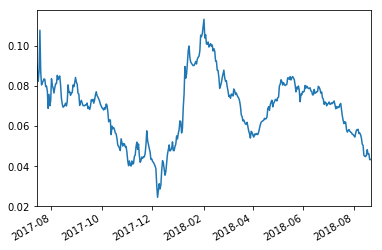

In [4]:
klines[pair_btc[0]]['close'].plot()

In [5]:
through_rate=0.5

vp_width = klines[pair_btc[0]].high - klines[pair_btc[0]].low
vp_thread = klines[pair_btc[0]].open + vp_width.shift(1) * through_rate
is_break_through = klines[pair_btc[0]].high > vp_thread


In [6]:
def cal_portion(f, profit, damping=0.2):
    if profit < 1:
        if f > damping:
            f_new = f - damping
        else:
            f_new = 0
    else:
        if f <= 1 - damping * 2:
            f_new = f + damping * 2
        else:
            f_new = 1
    return f_new
                

In [9]:
def simulation(losscut_ratio=0.02, is_losscut=False, is_manage=False):
    cummax = klines[pair_btc[0]].close[0]
    bid_price = klines[pair_btc[0]].close[0]
    close_done = True
    bid_done = False
    fee = pd.Series(np.ones_like(klines[pair_btc[0]].close), index=klines[pair_btc[0]].index)
    portions = pd.Series(np.ones_like(klines[pair_btc[0]].close), index=klines[pair_btc[0]].index)
    cummaxs = pd.Series(np.ones_like(klines[pair_btc[0]].close), index=klines[pair_btc[0]].index)
    profit = klines[pair_btc[0]].close
    portion = 1
    is_capture = pd.Series(False, index=klines[pair_btc[0]].index)
    n_trade = 0

    plt.figure()
    klines[pair_btc[0]]['close'].plot()
    plt.ion()

    for idx, bid in enumerate(is_break_through.values):
        if bid and close_done:
            bid_price = vp_thread[idx]
            profit[idx] = bid_price
            cummax = bid_price
            bid_done = True
            close_done = False
            plt.scatter(is_break_through.index[idx], bid_price, color='r')

        cummax = np.maximum(cummax, klines[pair_btc[0]].close[idx])
        cummaxs[idx] = cummax

        is_maxdrop = cummax * (1 - 0.15) > klines[pair_btc[0]].close[idx]

        if is_losscut:
            is_loss = bid_price * (1 - losscut_ratio) > klines[pair_btc[0]].close[idx]
            is_maxdrop = is_maxdrop or is_loss

        if bid_done and is_maxdrop:
            ask_price = klines[pair_btc[0]].close[idx]
            fee[idx] *= (1 - 0.0025)

            portion = cal_portion(portion, ask_price / bid_price * (1 - 0.0025))
            close_done = True
            bid_done = False
            plt.scatter(is_break_through.index[idx], ask_price, color='c')
            n_trade += 1

        if bid_done and ~close_done and idx == is_break_through.shape[0] - 1:
            ask_price = klines[pair_btc[0]].close[idx]
            fee[idx] *= (1 - 0.0025)

            portion = cal_portion(portion, ask_price / bid_price * (1 - 0.0025))
            close_done = True
            bid_done = False
            plt.scatter(is_break_through.index[idx], ask_price, color='c')
            n_trade += 1

        if is_manage:
            portions[idx] = portion

        if bid_done and ~close_done:
            is_capture[idx] = True

    cummaxs.plot()
    print("Total number of trade : %d" % (n_trade))
    return profit, portions, fee, is_capture

## ■ Applying simple volatility breakthrough!

Total number of trade : 18
Total Profit : 0.8436 / MDD : -0.6356


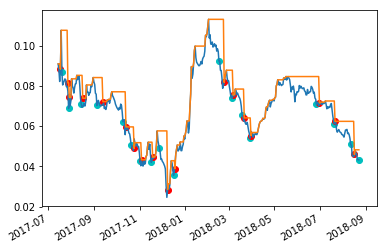

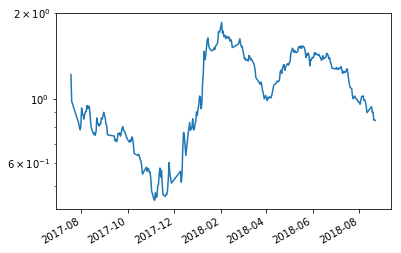

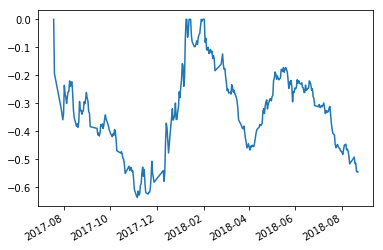

In [9]:
profit, portions, fee, is_capture = simulation(is_losscut=False, is_manage=False)

prf = (profit.pct_change(1) + 1)
is_cap_ = is_capture.shift(1).fillna(False)
# print(is_capture)
prf *= fee.shift(1)

plt.figure("profit")
prf_cap = prf[is_cap_].cumprod()
prf_cap.plot(logy=True)

plt.figure("mdd")
mdd = (prf_cap - prf_cap.cummax()) / prf_cap.cummax()
mdd.plot()
print("Total Profit : {0:0.4f} / MDD : {1:0.4f}".format(prf_cap[-1], mdd.min()))

## ■ 2% Loss-Cut 적용

Total number of trade : 32
Total Profit : 1.3858 / MDD : -0.5974


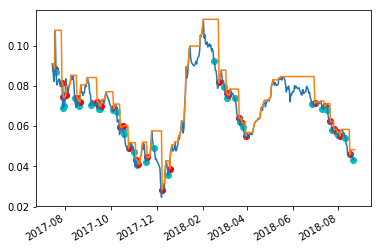

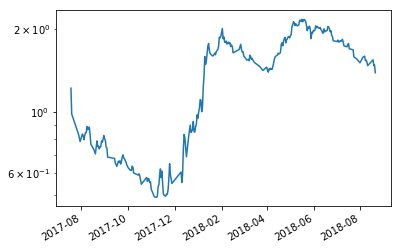

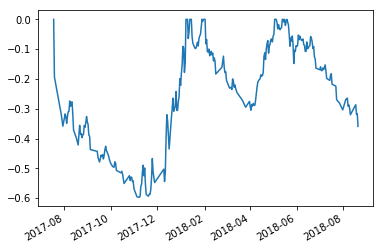

In [10]:
profit, portions, fee, is_capture = simulation(is_losscut=True, is_manage=False)

prf = (profit.pct_change(1) + 1)
is_cap_ = is_capture.shift(1).fillna(False)
# print(is_capture)
prf *= fee.shift(1)

plt.figure("profit")
prf_cap = prf[is_cap_].cumprod()
prf_cap.plot(logy=True)

plt.figure("mdd")
mdd = (prf_cap - prf_cap.cummax()) / prf_cap.cummax()
mdd.plot()
print("Total Profit : {0:0.4f} / MDD : {1:0.4f}".format(prf_cap[-1], mdd.min()))

## ■ 2% Rule 적용 [개별 종목 Loss-cut 5%]

Total number of trade : 24
Total Profit : 1.1245 / MDD : -0.3201


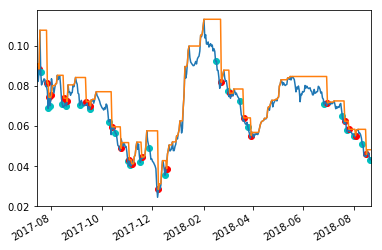

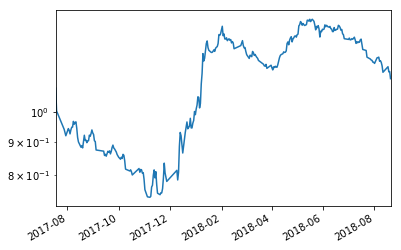

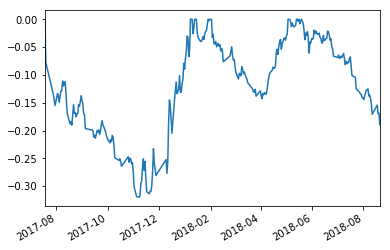

In [10]:
profit, portions, fee, is_capture = simulation(losscut_ratio=0.05, is_losscut=True, is_manage=False)

f=0.02 / 0.05
prf = (profit.pct_change(1) * f + 1)
is_cap_ = is_capture.shift(1).fillna(False)
# print(is_capture)
prf *= fee.shift(1)

plt.figure("profit")
prf_cap = prf[is_cap_].cumprod()
prf_cap.plot(logy=True)

plt.figure("mdd")
mdd = (prf_cap - prf_cap.cummax()) / prf_cap.cummax()
mdd.plot()
print("Total Profit : {0:0.4f} / MDD : {1:0.4f}".format(prf_cap[-1], mdd.min()))

## ■ 비중 조절 적용

Total number of trade : 32
Total Profit : 2.1932 / MDD : -0.3326


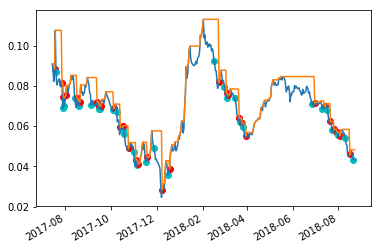

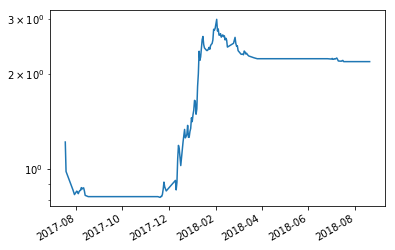

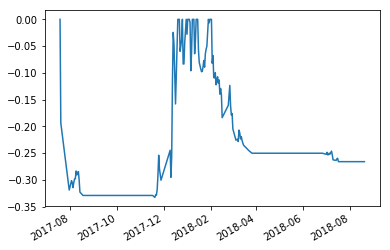

In [11]:
profit, portions, fee, is_capture = simulation(is_losscut=True, is_manage=True)

prf = profit.pct_change(1) * portions.shift(1) + 1
prf[portions.shift(1) == 0.0] = 1.0
prf *= fee.shift(1)

is_cap_ = is_capture.shift(1).fillna(False)
# print(is_capture)
plt.figure("profit")
prf_cap = prf[is_cap_].cumprod()
prf_cap.plot(logy=True)

plt.figure("mdd")
mdd = (prf_cap - prf_cap.cummax()) / prf_cap.cummax()
mdd.plot()
print("Total Profit : {0:0.4f} / MDD : {1:0.4f}".format(prf_cap[-1], mdd.min()))

## ■ 비중 조절 & 2% Rule 적용

Total number of trade : 24
Total Profit : 1.3777 / MDD : -0.1482


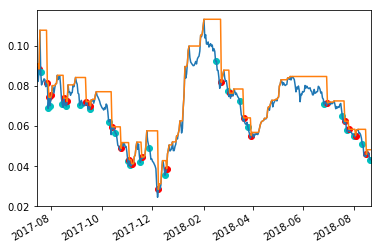

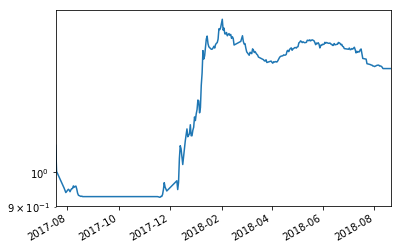

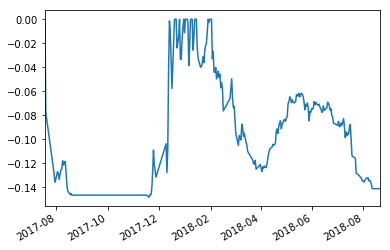

In [11]:
profit, portions, fee, is_capture = simulation(losscut_ratio=0.05, is_losscut=True, is_manage=True)

f=0.02/0.05
prf = profit.pct_change(1) * portions.shift(1) * f + 1
prf[portions.shift(1) == 0.0] = 1.0
prf *= fee.shift(1)

is_cap_ = is_capture.shift(1).fillna(False)
# print(is_capture)
plt.figure("profit")
prf_cap = prf[is_cap_].cumprod()
prf_cap.plot(logy=True)

plt.figure("mdd")
mdd = (prf_cap - prf_cap.cummax()) / prf_cap.cummax()
mdd.plot()
print("Total Profit : {0:0.4f} / MDD : {1:0.4f}".format(prf_cap[-1], mdd.min()))